In [3]:
!pip install scikit-learn==0.24.1  aif360==0.3.0  tensorflow==2.4.0 lime==0.2.0.1 nodejs==0.1.1 ipywidgets==7.6.3 #aix360==0.2.1

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
model = keras.models.load_model('model')

In [6]:
batch_size = 1
img_height = 244
img_width = 244
input_shape = (img_width,img_height)
num_classes=2

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))


Found 1410 files belonging to 2 classes.
Using 1128 files for training.
Found 1410 files belonging to 2 classes.
Using 282 files for validation.


In [7]:
predicted_classes = model.predict(val_ds, batch_size=batch_size)

In [8]:
import numpy as np
y_test = None
for features, labels in val_ds:
    if y_test is not None:
        y_test = np.vstack((y_test,labels.numpy()))
    else:
        y_test = labels.numpy()


In [9]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [44]:
# get an image
for image, label in val_ds:
    break
image = image.numpy()
image = image.reshape(244,244,3)

In [19]:
from lime.wrappers.scikit_image import SegmentationAlgorithm
segmentation_fn = SegmentationAlgorithm(algo_type = 'slic')

In [20]:
explanation = explainer.explain_instance(image, model.predict, segmentation_fn=segmentation_fn)


In [30]:
image, mask = explanation.get_image_and_mask(0)

In [45]:
image

array([[[255., 253., 215.],
        [255., 253., 215.],
        [255., 253., 215.],
        ...,
        [254., 253., 205.],
        [254., 253., 205.],
        [254., 253., 205.]],

       [[255., 253., 215.],
        [255., 253., 215.],
        [255., 253., 215.],
        ...,
        [254., 253., 205.],
        [254., 253., 205.],
        [254., 253., 205.]],

       [[255., 253., 215.],
        [255., 253., 215.],
        [255., 253., 215.],
        ...,
        [254., 253., 205.],
        [254., 253., 205.],
        [254., 253., 205.]],

       ...,

       [[125.,  83.,  91.],
        [125.,  83.,  91.],
        [125.,  83.,  91.],
        ...,
        [250., 249., 200.],
        [250., 249., 200.],
        [250., 249., 200.]],

       [[125.,  83.,  91.],
        [125.,  83.,  91.],
        [125.,  83.,  91.],
        ...,
        [250., 249., 200.],
        [250., 249., 200.],
        [250., 249., 200.]],

       [[125.,  83.,  91.],
        [125.,  83.,  91.],
        [125.,  

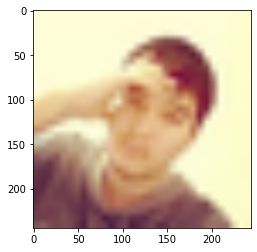

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(image.astype(int))

In [41]:
from PIL import Image



img = Image.fromarray(image, 'RGB')
img.save('my.png')
img.show()

In [35]:
!ls

confusion-matrix.ipynb	prepare-data.ipynb
data			prepare-data-trusted-ai.ipynb
demo_lime.ipynb		README.md
LICENSE			train.ipynb
lime.ipynb		train.pipeline
LIME.ipynb		train-trusted-ai.ipynb
model			train-trusted-ai.pipeline
my.png
